# Data Loading

In [1]:
#Import libraries
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from keras.datasets import cifar10
import tensorflow as tf
from tensorflow.keras.regularizers import l2

In [4]:
# Load cifar10 dataset into training and testing datasets

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Data Preprocessing

In [5]:
# Print the shape of the training and testing dataset
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


Here the target dataset has 2 dimensions. I am going to reshape to single dimension.

In [6]:
y_train = y_train.reshape(-1,)
y_test  = y_test.reshape(-1,)
print(y_train.shape)
print(y_test.shape)

(50000,)
(10000,)


Now, I am going to plot the sample images

In [7]:
class_names = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

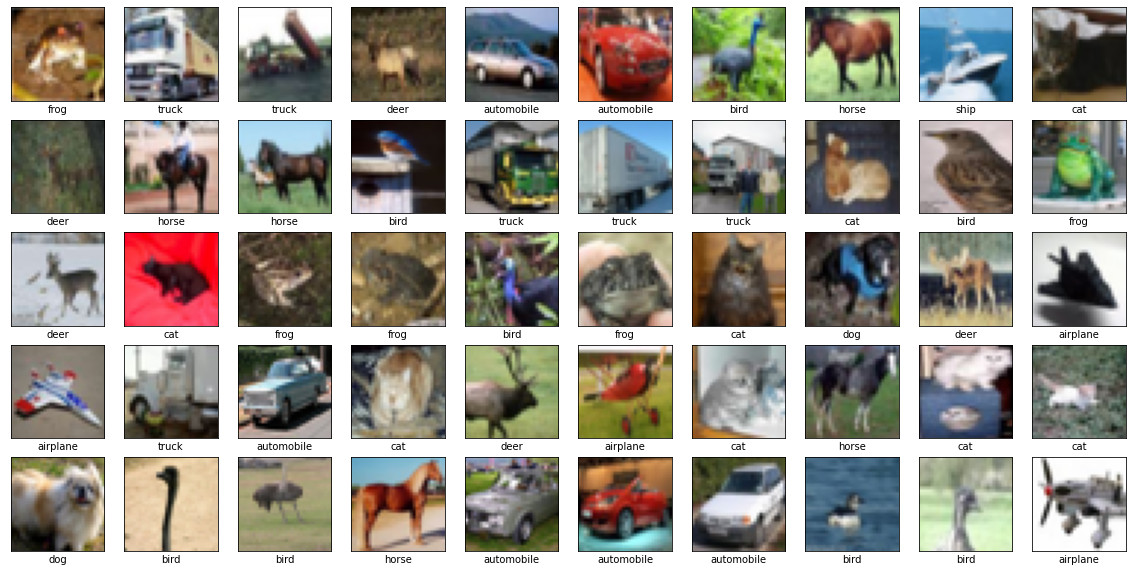

In [8]:
plt.figure(figsize=(20, 10))
for i in range(50):
    plt.subplot(5, 10, i + 1)  
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i])
    plt.xlabel(class_names[y_train[i]])
plt.show()

Now, I am going to normalize test and the training data by scaling the pixel values of the image in the range 0 to 1, which was 0 to 255.

In [9]:
# Scale the pixel values of the image in the range 0 to 1
X_train, X_test = X_train / 255, X_test / 255

# Printing labels from the trained data.
print(y_train[:10])

[6 9 9 4 1 1 2 7 8 3]


Now, I am going to do label encoding for transforming categorical data into continuous.

In [10]:
y_train = tf.one_hot(y_train.astype(np.int32), depth = 10)
y_test = tf.one_hot(y_test.astype(np.int32), depth = 10)

# Printing one hot encoded labels
print(y_train[:10])

tf.Tensor(
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]], shape=(10, 10), dtype=float32)


tf.Tensor([0. 1. 0. 0. 0. 0. 0. 0. 0. 0.], shape=(10,), dtype=float32)


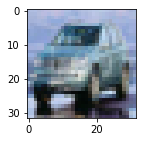

In [11]:
plt.figure(figsize=(15, 2))
plt.imshow(X_train[375])
print(y_train[375])

# Building the CNN Model using Tensorflow with SGD optimizer

In [12]:
# Learning Rate 0.01

model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, 3, padding='same', input_shape= X_train.shape[1:], activation='relu'),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.BatchNormalization(),    
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(64, 3, activation='relu'),
    tf.keras.layers.BatchNormalization(),      
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Conv2D(128, 3, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(128, 3, activation='relu'),
    tf.keras.layers.BatchNormalization(),      
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, kernel_regularizer = l2(0.01), activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax'),
])

model_1.compile(optimizer = tf.keras.optimizers.SGD(learning_rate = 0.01, momentum = 0.9, weight_decay = 5e-4),
            loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
model_1_accuracy = model_1.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
1563/1563 [==============================] - 375s 239ms/step - loss: 2.8101 - accuracy: 0.3396
Epoch 2/100
1563/1563 [==============================] - 262s 167ms/step - loss: 1.6621 - accuracy: 0.4634
Epoch 3/100
1563/1563 [==============================] - 261s 167ms/step - loss: 1.4691 - accuracy: 0.5413
Epoch 4/100
1563/1563 [==============================] - 260s 167ms/step - loss: 1.3332 - accuracy: 0.5958
Epoch 5/100
1563/1563 [==============================] - 257s 165ms/step - loss: 1.2541 - accuracy: 0.6298
Epoch 6/100
1563/1563 [==============================] - 264s 169ms/step - loss: 1.1733 - accuracy: 0.6606
Epoch 7/100
1563/1563 [==============================] - 518s 332ms/step - loss: 1.1144 - accuracy: 0.6873
Epoch 8/100
1563/1563 [==============================] - 149s 95ms/step - loss: 1.0644 - accuracy: 0.7045
Epoch 9/100
1563/1563 [==============================] - 150s 96ms/step - loss: 1.0280 - accuracy: 0.7158
Epoch 10/100
1563/1563 [===============

In [18]:
# Learning Rate 0.001

model_1_2 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, 3, padding='same', input_shape= X_train.shape[1:], activation='relu'),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.BatchNormalization(),    
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(64, 3, activation='relu'),
    tf.keras.layers.BatchNormalization(),      
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Conv2D(128, 3, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(128, 3, activation='relu'),
    tf.keras.layers.BatchNormalization(),      
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, kernel_regularizer = l2(0.01), activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax'),
])

model_1_2.compile(optimizer = tf.keras.optimizers.SGD(learning_rate = 0.001, momentum = 0.9, weight_decay = 5e-4),
            loss='categorical_crossentropy', metrics=['accuracy'])

In [15]:
model_1_2_accuracy = model_1_2.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
1563/1563 [==============================] - 195s 124ms/step - loss: 5.6065 - accuracy: 0.3530
Epoch 2/100
1563/1563 [==============================] - 195s 125ms/step - loss: 3.4076 - accuracy: 0.5031
Epoch 3/100
1563/1563 [==============================] - 196s 125ms/step - loss: 2.2949 - accuracy: 0.5745
Epoch 4/100
1563/1563 [==============================] - 195s 125ms/step - loss: 1.6823 - accuracy: 0.6185
Epoch 5/100
1563/1563 [==============================] - 196s 125ms/step - loss: 1.3217 - accuracy: 0.6552
Epoch 6/100
1563/1563 [==============================] - 497s 318ms/step - loss: 1.1083 - accuracy: 0.6867
Epoch 7/100
1563/1563 [==============================] - 193s 124ms/step - loss: 0.9815 - accuracy: 0.7051
Epoch 8/100
1563/1563 [==============================] - 194s 124ms/step - loss: 0.8939 - accuracy: 0.7257
Epoch 9/100
1563/1563 [==============================] - 196s 125ms/step - loss: 0.8338 - accuracy: 0.7390
Epoch 10/100
1563/1563 [=============

Epoch 77/100
1563/1563 [==============================] - 585s 374ms/step - loss: 0.2918 - accuracy: 0.9279
Epoch 78/100
1563/1563 [==============================] - 585s 374ms/step - loss: 0.2860 - accuracy: 0.9304
Epoch 79/100
1563/1563 [==============================] - 592s 379ms/step - loss: 0.2823 - accuracy: 0.9307
Epoch 80/100
1563/1563 [==============================] - 596s 382ms/step - loss: 0.2820 - accuracy: 0.9302
Epoch 81/100
1563/1563 [==============================] - 595s 380ms/step - loss: 0.2798 - accuracy: 0.9325
Epoch 82/100
1563/1563 [==============================] - 598s 383ms/step - loss: 0.2768 - accuracy: 0.9320
Epoch 83/100
1563/1563 [==============================] - 603s 386ms/step - loss: 0.2770 - accuracy: 0.9318
Epoch 84/100
1563/1563 [==============================] - 598s 382ms/step - loss: 0.2750 - accuracy: 0.9332
Epoch 85/100
1563/1563 [==============================] - 419s 268ms/step - loss: 0.2739 - accuracy: 0.9340
Epoch 86/100
1563/1563 [====

In [16]:
# Learning Rate 0.0001

model_1_3 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, 3, padding='same', input_shape= X_train.shape[1:], activation='relu'),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.BatchNormalization(),    
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(64, 3, activation='relu'),
    tf.keras.layers.BatchNormalization(),      
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Conv2D(128, 3, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(128, 3, activation='relu'),
    tf.keras.layers.BatchNormalization(),      
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, kernel_regularizer = l2(0.01), activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax'),
])

model_1_3.compile(optimizer = tf.keras.optimizers.SGD(learning_rate = 0.0001, momentum = 0.9, weight_decay = 5e-4),
            loss='categorical_crossentropy', metrics=['accuracy'])

In [17]:
model_1_3_accuracy = model_1_3.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
1563/1563 [==============================] - 726s 447ms/step - loss: 7.2722 - accuracy: 0.2453
Epoch 2/100
1563/1563 [==============================] - 575s 368ms/step - loss: 6.4208 - accuracy: 0.3551
Epoch 3/100
1563/1563 [==============================] - 753s 481ms/step - loss: 5.9812 - accuracy: 0.4045
Epoch 4/100
1563/1563 [==============================] - 255s 163ms/step - loss: 5.6291 - accuracy: 0.4387
Epoch 5/100
1563/1563 [==============================] - 255s 163ms/step - loss: 5.3102 - accuracy: 0.4645
Epoch 6/100
1563/1563 [==============================] - 252s 161ms/step - loss: 5.0118 - accuracy: 0.4917
Epoch 7/100
1563/1563 [==============================] - 252s 161ms/step - loss: 4.7347 - accuracy: 0.5133
Epoch 8/100
1563/1563 [==============================] - 250s 160ms/step - loss: 4.4840 - accuracy: 0.5307
Epoch 9/100
1563/1563 [==============================] - 251s 161ms/step - loss: 4.2503 - accuracy: 0.5483
Epoch 10/100
1563/1563 [=============

# Building the CNN Model using Tensorflow with RMSprop optimizer

In [17]:
# Learning Rate 0.01

model_2 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, 3, padding='same', input_shape= X_train.shape[1:], activation='relu'),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.BatchNormalization(),    
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(64, 3, activation='relu'),
    tf.keras.layers.BatchNormalization(),      
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Conv2D(128, 3, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(128, 3, activation='relu'),
    tf.keras.layers.BatchNormalization(),      
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, kernel_regularizer = l2(0.01), activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax'),
])

model_2.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate = 0.01),
            loss='categorical_crossentropy', metrics=['accuracy'])

#model_2.compile(optimizer = tf.keras.optimizers.legacy.RMSprop(learning_rate = 0.0001, decay=1e-06),
 #           loss='categorical_crossentropy', metrics=['accuracy'])

In [32]:
model_2_accuracy = model_2.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
1563/1563 [==============================] - 1293s 824ms/step - loss: 2.2617 - accuracy: 0.3221
Epoch 2/100
1563/1563 [==============================] - 674s 431ms/step - loss: 1.7486 - accuracy: 0.4134
Epoch 3/100
1563/1563 [==============================] - 557s 356ms/step - loss: 1.6723 - accuracy: 0.4480
Epoch 4/100
1563/1563 [==============================] - 553s 354ms/step - loss: 1.6058 - accuracy: 0.4763
Epoch 5/100
1563/1563 [==============================] - 557s 356ms/step - loss: 1.5750 - accuracy: 0.4967
Epoch 6/100
1563/1563 [==============================] - 553s 354ms/step - loss: 1.5375 - accuracy: 0.5146
Epoch 7/100
1563/1563 [==============================] - 554s 355ms/step - loss: 1.5124 - accuracy: 0.5242
Epoch 8/100
1563/1563 [==============================] - 552s 353ms/step - loss: 1.4961 - accuracy: 0.5347
Epoch 9/100
1563/1563 [==============================] - 554s 355ms/step - loss: 1.4710 - accuracy: 0.5407
Epoch 10/100
1563/1563 [============

# Building the CNN Model using Tensorflow with Adam optimizer

In [21]:
# Learning Rate 0.01

model_3 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, 3, padding='same', input_shape= X_train.shape[1:], activation='relu'),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.BatchNormalization(),    
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(64, 3, activation='relu'),
    tf.keras.layers.BatchNormalization(),      
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Conv2D(128, 3, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(128, 3, activation='relu'),
    tf.keras.layers.BatchNormalization(),      
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, kernel_regularizer = l2(0.01), activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax'),
])

model_3.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01),
            loss='categorical_crossentropy', metrics=['accuracy'])

In [22]:
model_3_accuracy = model_3.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
1563/1563 [==============================] - 155s 97ms/step - loss: 2.3670 - accuracy: 0.2845
Epoch 2/100
1563/1563 [==============================] - 153s 98ms/step - loss: 1.8184 - accuracy: 0.3682
Epoch 3/100
1563/1563 [==============================] - 147s 94ms/step - loss: 1.7019 - accuracy: 0.4257
Epoch 4/100
1563/1563 [==============================] - 145s 93ms/step - loss: 1.6071 - accuracy: 0.4667
Epoch 5/100
1563/1563 [==============================] - 145s 93ms/step - loss: 1.5098 - accuracy: 0.5184
Epoch 6/100
1563/1563 [==============================] - 145s 93ms/step - loss: 1.4270 - accuracy: 0.5542
Epoch 7/100
1563/1563 [==============================] - 145s 93ms/step - loss: 1.3839 - accuracy: 0.5740
Epoch 8/100
1563/1563 [==============================] - 147s 94ms/step - loss: 1.3228 - accuracy: 0.5990
Epoch 9/100
1563/1563 [==============================] - 147s 94ms/step - loss: 1.2987 - accuracy: 0.6085
Epoch 10/100
1563/1563 [======================

In [36]:
# Learning Rate 0.001

model_3_2 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, 3, padding='same', input_shape= X_train.shape[1:], activation='relu'),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.BatchNormalization(),    
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(64, 3, activation='relu'),
    tf.keras.layers.BatchNormalization(),      
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Conv2D(128, 3, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(128, 3, activation='relu'),
    tf.keras.layers.BatchNormalization(),      
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, kernel_regularizer = l2(0.01), activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax'),
])

model_3_2.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
            loss='categorical_crossentropy', metrics=['accuracy'])

In [39]:
model_3_2_accuracy = model_3_2.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
1563/1563 [==============================] - 366s 234ms/step - loss: 2.1274 - accuracy: 0.4733
Epoch 2/100
1563/1563 [==============================] - 305s 195ms/step - loss: 1.3421 - accuracy: 0.6129
Epoch 3/100
1563/1563 [==============================] - 320s 205ms/step - loss: 1.1753 - accuracy: 0.6761
Epoch 4/100
1563/1563 [==============================] - 307s 196ms/step - loss: 1.0879 - accuracy: 0.7103
Epoch 5/100
1563/1563 [==============================] - 305s 195ms/step - loss: 1.0124 - accuracy: 0.7374
Epoch 6/100
1563/1563 [==============================] - 312s 199ms/step - loss: 0.9695 - accuracy: 0.7551
Epoch 7/100
1563/1563 [==============================] - 380s 243ms/step - loss: 0.9229 - accuracy: 0.7690
Epoch 8/100
1563/1563 [==============================] - 328s 210ms/step - loss: 0.8957 - accuracy: 0.7793
Epoch 9/100
1563/1563 [==============================] - 301s 193ms/step - loss: 0.8662 - accuracy: 0.7899
Epoch 10/100
1563/1563 [=============

KeyboardInterrupt: 

NameError: name 'model_3_2' is not defined

In [23]:
# RMSprop Learning Rate 0.001

model_2_2 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, 3, padding='same', input_shape= X_train.shape[1:], activation='relu'),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.BatchNormalization(),    
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(64, 3, activation='relu'),
    tf.keras.layers.BatchNormalization(),      
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Conv2D(128, 3, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(128, 3, activation='relu'),
    tf.keras.layers.BatchNormalization(),      
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, kernel_regularizer = l2(0.01), activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax'),
])

model_2_2.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate = 0.001),
            loss='categorical_crossentropy', metrics=['accuracy'])

In [24]:
model_2_2_accuracy = model_2_2.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
1563/1563 [==============================] - 156s 99ms/step - loss: 2.2044 - accuracy: 0.4810
Epoch 2/100
1563/1563 [==============================] - 156s 100ms/step - loss: 1.2804 - accuracy: 0.6400
Epoch 3/100
1563/1563 [==============================] - 155s 99ms/step - loss: 1.1320 - accuracy: 0.6935
Epoch 4/100
1563/1563 [==============================] - 161s 103ms/step - loss: 1.0487 - accuracy: 0.7249
Epoch 5/100
1563/1563 [==============================] - 154s 99ms/step - loss: 0.9780 - accuracy: 0.7442
Epoch 6/100
1563/1563 [==============================] - 157s 100ms/step - loss: 0.9280 - accuracy: 0.7592
Epoch 7/100
1563/1563 [==============================] - 164s 105ms/step - loss: 0.8743 - accuracy: 0.7726
Epoch 8/100
1563/1563 [==============================] - 176s 112ms/step - loss: 0.8484 - accuracy: 0.7806
Epoch 9/100
1563/1563 [==============================] - 160s 102ms/step - loss: 0.8170 - accuracy: 0.7893
Epoch 10/100
1563/1563 [================

1563/1563 [==============================] - 159s 102ms/step - loss: 0.4045 - accuracy: 0.9137
Epoch 78/100
1563/1563 [==============================] - 159s 102ms/step - loss: 0.4097 - accuracy: 0.9133
Epoch 79/100
1563/1563 [==============================] - 156s 100ms/step - loss: 0.4066 - accuracy: 0.9129
Epoch 80/100
1563/1563 [==============================] - 157s 101ms/step - loss: 0.4078 - accuracy: 0.9112
Epoch 81/100
1563/1563 [==============================] - 168s 108ms/step - loss: 0.4038 - accuracy: 0.9149
Epoch 82/100
1563/1563 [==============================] - 176s 112ms/step - loss: 0.4011 - accuracy: 0.9138
Epoch 83/100
1563/1563 [==============================] - 177s 113ms/step - loss: 0.3989 - accuracy: 0.9148
Epoch 84/100
1563/1563 [==============================] - 174s 112ms/step - loss: 0.3923 - accuracy: 0.9171
Epoch 85/100
1563/1563 [==============================] - 198s 127ms/step - loss: 0.3933 - accuracy: 0.9179
Epoch 86/100
1563/1563 [=================

In [25]:
# RMSprop Learning Rate 0.0001

model_2_3 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, 3, padding='same', input_shape= X_train.shape[1:], activation='relu'),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.BatchNormalization(),    
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(64, 3, activation='relu'),
    tf.keras.layers.BatchNormalization(),      
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Conv2D(128, 3, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(128, 3, activation='relu'),
    tf.keras.layers.BatchNormalization(),      
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, kernel_regularizer = l2(0.01), activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax'),
])

model_2_3.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate = 0.0001),
            loss='categorical_crossentropy', metrics=['accuracy'])

In [26]:
model_2_3_accuracy = model_2_3.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
1563/1563 [==============================] - 228s 143ms/step - loss: 5.4849 - accuracy: 0.3450
Epoch 2/100
1563/1563 [==============================] - 212s 136ms/step - loss: 2.9546 - accuracy: 0.5037
Epoch 3/100
1563/1563 [==============================] - 212s 135ms/step - loss: 1.9459 - accuracy: 0.5769
Epoch 4/100
1563/1563 [==============================] - 212s 136ms/step - loss: 1.4653 - accuracy: 0.6230
Epoch 5/100
1563/1563 [==============================] - 212s 136ms/step - loss: 1.2117 - accuracy: 0.6589
Epoch 6/100
1563/1563 [==============================] - 212s 136ms/step - loss: 1.0593 - accuracy: 0.6851
Epoch 7/100
1563/1563 [==============================] - 212s 135ms/step - loss: 0.9603 - accuracy: 0.7065
Epoch 8/100
1563/1563 [==============================] - 220s 141ms/step - loss: 0.8906 - accuracy: 0.7244
Epoch 9/100
1563/1563 [==============================] - 238s 152ms/step - loss: 0.8440 - accuracy: 0.7357
Epoch 10/100
1563/1563 [=============

In [27]:
# Learning Rate 0.0001

model_3_3 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, 3, padding='same', input_shape= X_train.shape[1:], activation='relu'),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.BatchNormalization(),    
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(64, 3, activation='relu'),
    tf.keras.layers.BatchNormalization(),      
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Conv2D(128, 3, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(128, 3, activation='relu'),
    tf.keras.layers.BatchNormalization(),      
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, kernel_regularizer = l2(0.01), activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax'),
])

model_3_3.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001),
            loss='categorical_crossentropy', metrics=['accuracy'])

In [28]:
model_3_3_accuracy = model_3_3.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
1563/1563 [==============================] - 491s 295ms/step - loss: 5.8456 - accuracy: 0.3132
Epoch 2/100
1563/1563 [==============================] - 267s 171ms/step - loss: 3.3811 - accuracy: 0.4597
Epoch 3/100
1563/1563 [==============================] - 266s 170ms/step - loss: 2.1686 - accuracy: 0.5397
Epoch 4/100
1563/1563 [==============================] - 267s 171ms/step - loss: 1.5774 - accuracy: 0.5949
Epoch 5/100
1563/1563 [==============================] - 267s 171ms/step - loss: 1.2737 - accuracy: 0.6394
Epoch 6/100
1563/1563 [==============================] - 265s 170ms/step - loss: 1.0968 - accuracy: 0.6699
Epoch 7/100
1563/1563 [==============================] - 265s 170ms/step - loss: 0.9784 - accuracy: 0.6998
Epoch 8/100
1563/1563 [==============================] - 293s 187ms/step - loss: 0.9054 - accuracy: 0.7189
Epoch 9/100
1563/1563 [==============================] - 265s 170ms/step - loss: 0.8455 - accuracy: 0.7370
Epoch 10/100
1563/1563 [=============

Epoch 77/100
1563/1563 [==============================] - 292s 187ms/step - loss: 0.2589 - accuracy: 0.9387
Epoch 78/100
1563/1563 [==============================] - 270s 173ms/step - loss: 0.2528 - accuracy: 0.9412
Epoch 79/100
1563/1563 [==============================] - 270s 173ms/step - loss: 0.2550 - accuracy: 0.9397
Epoch 80/100
1563/1563 [==============================] - 271s 173ms/step - loss: 0.2551 - accuracy: 0.9394
Epoch 81/100
1563/1563 [==============================] - 270s 173ms/step - loss: 0.2539 - accuracy: 0.9396
Epoch 82/100
1563/1563 [==============================] - 274s 175ms/step - loss: 0.2541 - accuracy: 0.9408
Epoch 83/100
1563/1563 [==============================] - 272s 174ms/step - loss: 0.2445 - accuracy: 0.9440
Epoch 84/100
1563/1563 [==============================] - 290s 185ms/step - loss: 0.2483 - accuracy: 0.9422
Epoch 85/100
1563/1563 [==============================] - 318s 204ms/step - loss: 0.2433 - accuracy: 0.9427
Epoch 86/100
1563/1563 [====

In [29]:
#cnn = model_3
#model_accuracy = model_3_accuracy
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 batch_normalization (BatchN  (None, 30, 30, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 15, 15, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 15, 15, 64)        1

In [30]:
#cnn.summary()

# Model Evaluation

I am going to plot the Loss and Accuracy Curves for the evaluation

In [31]:
plt.plot(model_1_accuracy.history['loss'], color='b', label="SGD (Learning Rate - 0.01)")
plt.plot(model_2_accuracy.history['loss'], color='r', label="RMSprop (Learning Rate - 0.01)")
plt.plot(model_3_accuracy.history['loss'], color='g', label="Adam (Learning Rate - 0.01)")
plt.plot(model_1_2_accuracy.history['loss'], color='b', label="SGD (Learning Rate - 0.001)")
plt.plot(model_2_2_accuracy.history['loss'], color='r', label="RMSprop (Learning Rate - 0.001)")
plt.plot(model_3_2_accuracy.history['loss'], color='g', label="Adam (Learning Rate - 0.001)")
plt.plot(model_1_3_accuracy.history['loss'], color='b', label="SGD (Learning Rate - 0.0001)")
plt.plot(model_2_3_accuracy.history['loss'], color='r', label="RMSprop (Learning Rate - 0.0001)")
plt.plot(model_3_3_accuracy.history['loss'], color='g', label="Adam (Learning Rate - 0.0001)")
legend = plt.legend(loc = 'best', shadow = True)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs. No. of epochs for each optimizer')

NameError: name 'model_1_accuracy' is not defined

In [ ]:
plt.plot(model_1_accuracy.history['accuracy'], color='b', label="SGD (Learning Rate - 0.01)")
plt.plot(model_2_accuracy.history['accuracy'], color='r', label="RMSprop (Learning Rate - 0.01)")
plt.plot(model_3_accuracy.history['accuracy'], color='g', label="Adam (Learning Rate - 0.01)")
plt.plot(model_1_2_accuracy.history['accuracy'], color='b', label="SGD (Learning Rate - 0.001)")
plt.plot(model_2_2_accuracy.history['accuracy'], color='r', label="RMSprop (Learning Rate - 0.001)")
plt.plot(model_3_2_accuracy.history['accuracy'], color='g', label="Adam (Learning Rate - 0.001)")
plt.plot(model_1_3_accuracy.history['accuracy'], color='b', label="SGD (Learning Rate - 0.0001)")
plt.plot(model_2_3_accuracy.history['accuracy'], color='r', label="RMSprop (Learning Rate - 0.0001)")
plt.plot(model_3_3_accuracy.history['accuracy'], color='g', label="Adam (Learning Rate - 0.0001)")
legend = plt.legend(loc = 'best', shadow = True)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. No. of epochs for each optimizer')

Now, I am going to evaluate the model accuracy with the testing data for each optimizer for each learning rate.

In [ ]:
print("Model accuracy of model with SGD optimizer with a learning rate of 0.01 with the testing data")
test_loss_1, test_accuracy_1 = model_1.evaluate(X_test, y_test)
print("Model accuracy of model with SGD optimizer with a learning rate of 0.001 with the testing data")
test_loss_1_2, test_accuracy_1_2 = model_1_2.evaluate(X_test, y_test)
print("Model accuracy of model with SGD optimizer with a learning rate of 0.0001 with the testing data")
test_loss_1_3, test_accuracy_1_3 = model_1_3.evaluate(X_test, y_test)

print("Model accuracy of model with RMSprop optimizer with a learning rate of 0.01 with the testing data")
test_loss_2, test_accuracy_2 = model_2.evaluate(X_test, y_test)
print("Model accuracy of model with RMSprop optimizer with a learning rate of 0.001 with the testing data")
test_loss_2_2, test_accuracy_2_2 = model_2_2.evaluate(X_test, y_test)
print("Model accuracy of model with RMSprop optimizer with a learning rate of 0.0001 with the testing data")
test_loss_2_3, test_accuracy_2_3 = model_2_3.evaluate(X_test, y_test)

print("Model accuracy of model with Adam optimizer with a learning rate of 0.01 with the testing data")
test_loss_3, test_accuracy_3 = model_3.evaluate(X_test, y_test)
print("Model accuracy of model with Adam optimizer with a learning rate of 0.001 with the testing data")
test_loss_3_2, test_accuracy_3_2 = model_3_2.evaluate(X_test, y_test)
print("Model accuracy of model with Adam optimizer with a learning rate of 0.0001 with the testing data")
test_loss_3_3, test_accuracy_3_3 = model_3_3.evaluate(X_test, y_test)

# Confusion Matrix

Confusion Matrix for SGD optimizer with a Learning Rate of 0.01

In [ ]:
# Predicting the values with the test data
y_pred = model_1.predict(X_test)

# Converting predicted classes to one hot vector
y_pred_classes = np.argmax(y_pred, axis = 1)

# Converting test classes to one hot vector
y_true = np.argmax(y_test, axis = 1)

# Generating the confusion matrix
confusion_matrix = tf.math.confusion_matrix(y_true, y_pred_classes)

In [ ]:
# Plotting the confusion matrix on heat map
plt.figure(figsize = (15, 10))
c = sns.heatmap(confusion_matrix, annot = True, cmap='coolwarm', fmt = 'g')
c.set(xticklabels = class_names, yticklabels = class_names)

Confusion Matrix for SGD optimizer with a Learning Rate of 0.001

In [ ]:
# Predicting the values with the test data
y_pred = model_1_2.predict(X_test)

# Converting predicted classes to one hot vector
y_pred_classes = np.argmax(y_pred, axis = 1)

# Converting test classes to one hot vector
y_true = np.argmax(y_test, axis = 1)

# Generating the confusion matrix
confusion_matrix = tf.math.confusion_matrix(y_true, y_pred_classes)

In [ ]:
# Plotting the confusion matrix on heat map
plt.figure(figsize = (15, 10))
c = sns.heatmap(confusion_matrix, annot = True, cmap='coolwarm', fmt = 'g')
c.set(xticklabels = class_names, yticklabels = class_names)

Confusion Matrix for SGD optimizer with a Learning Rate of 0.0001

In [ ]:
# Predicting the values with the test data
y_pred = model_1_3.predict(X_test)

# Converting predicted classes to one hot vector
y_pred_classes = np.argmax(y_pred, axis = 1)

# Converting test classes to one hot vector
y_true = np.argmax(y_test, axis = 1)

# Generating the confusion matrix
confusion_matrix = tf.math.confusion_matrix(y_true, y_pred_classes)

In [ ]:
# Plotting the confusion matrix on heat map
plt.figure(figsize = (15, 10))
c = sns.heatmap(confusion_matrix, annot = True, cmap='coolwarm', fmt = 'g')
c.set(xticklabels = class_names, yticklabels = class_names)

Confusion Matrix for RMSprop optimizer with a Learning Rate of 0.01

In [ ]:
# Predicting the values with the test data
y_pred = model_2.predict(X_test)

# Converting predicted classes to one hot vector
y_pred_classes = np.argmax(y_pred, axis = 1)

# Converting test classes to one hot vector
y_true = np.argmax(y_test, axis = 1)

# Generating the confusion matrix
confusion_matrix = tf.math.confusion_matrix(y_true, y_pred_classes)

In [ ]:
# Plotting the confusion matrix on heat map
plt.figure(figsize = (15, 10))
c = sns.heatmap(confusion_matrix, annot = True, cmap='coolwarm', fmt = 'g')
c.set(xticklabels = class_names, yticklabels = class_names)

Confusion Matrix for RMSprop optimizer with a Learning Rate of 0.001

In [ ]:
# Predicting the values with the test data
y_pred = model_2_2.predict(X_test)

# Converting predicted classes to one hot vector
y_pred_classes = np.argmax(y_pred, axis = 1)

# Converting test classes to one hot vector
y_true = np.argmax(y_test, axis = 1)

# Generating the confusion matrix
confusion_matrix = tf.math.confusion_matrix(y_true, y_pred_classes)

In [ ]:
# Plotting the confusion matrix on heat map
plt.figure(figsize = (15, 10))
c = sns.heatmap(confusion_matrix, annot = True, cmap='coolwarm', fmt = 'g')
c.set(xticklabels = class_names, yticklabels = class_names)

Confusion Matrix for RMSprop optimizer with a Learning Rate of 0.0001

In [ ]:
# Predicting the values with the test data
y_pred = model_2_3.predict(X_test)

# Converting predicted classes to one hot vector
y_pred_classes = np.argmax(y_pred, axis = 1)

# Converting test classes to one hot vector
y_true = np.argmax(y_test, axis = 1)

# Generating the confusion matrix
confusion_matrix = tf.math.confusion_matrix(y_true, y_pred_classes)

In [ ]:
# Plotting the confusion matrix on heat map
plt.figure(figsize = (15, 10))
c = sns.heatmap(confusion_matrix, annot = True, cmap='coolwarm', fmt = 'g')
c.set(xticklabels = class_names, yticklabels = class_names)

Confusion Matrix for Adam optimizer with a Learning Rate of 0.01

In [ ]:
# Predicting the values with the test data
y_pred = model_3.predict(X_test)

# Converting predicted classes to one hot vector
y_pred_classes = np.argmax(y_pred, axis = 1)

# Converting test classes to one hot vector
y_true = np.argmax(y_test, axis = 1)

# Generating the confusion matrix
confusion_matrix = tf.math.confusion_matrix(y_true, y_pred_classes)

In [ ]:
# Plotting the confusion matrix on heat map
plt.figure(figsize = (15, 10))
c = sns.heatmap(confusion_matrix, annot = True, cmap='coolwarm', fmt = 'g')
c.set(xticklabels = class_names, yticklabels = class_names)

Confusion Matrix for Adam optimizer with a Learning Rate of 0.001

In [ ]:
# Predicting the values with the test data
y_pred = model_3_2.predict(X_test)

# Converting predicted classes to one hot vector
y_pred_classes = np.argmax(y_pred, axis = 1)

# Converting test classes to one hot vector
y_true = np.argmax(y_test, axis = 1)

# Generating the confusion matrix
confusion_matrix = tf.math.confusion_matrix(y_true, y_pred_classes)

In [ ]:
# Plotting the confusion matrix on heat map
plt.figure(figsize = (15, 10))
c = sns.heatmap(confusion_matrix, annot = True, cmap='coolwarm', fmt = 'g')
c.set(xticklabels = class_names, yticklabels = class_names)

Confusion Matrix for Adam optimizer with a Learning Rate of 0.0001

In [ ]:
# Predicting the values with the test data
y_pred = model_3_3.predict(X_test)

# Converting predicted classes to one hot vector
y_pred_classes = np.argmax(y_pred, axis = 1)

# Converting test classes to one hot vector
y_true = np.argmax(y_test, axis = 1)

# Generating the confusion matrix
confusion_matrix = tf.math.confusion_matrix(y_true, y_pred_classes)

In [ ]:
# Plotting the confusion matrix on heat map
plt.figure(figsize = (15, 10))
c = sns.heatmap(confusion_matrix, annot = True, cmap='coolwarm', fmt = 'g')
c.set(xticklabels = class_names, yticklabels = class_names)